# Linear Model for Classification
#### Generalized Predict Function
- $\hat{y} = w[0] \times x[0] + w[1] \times x[1] + ... + w[p] \times x[p] + b > 0$   -> binary classification
- $\hat{y}$ is decision boundary to classify (compare with 0)
- $x[0]$ to $x[p]$ is features (p+1 features exist)
- $w[0]$ to $w[p]$ and $b$ is the parameter that the model study
- Logistic Regression, Support Vector Machine ...

In [1]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split

# Overall: Logistic Regression & Support Vector Machine

#### Difference
- Logistic Regression
    - Use logistic loss function in binary classification
    - Use Cross entropy loss funcion in multi classification
- SVM
    - Use Squared hinge loss function
    
#### Example 1: forge Datasets
- Both Logistic Regression and Support Vector Machine use R2 Regularization
- Control the model using C
- when C is too large, it can be overfitting to the training set.
- when C is too small, it can be underfitting model.
- More featrues dataset -> better model



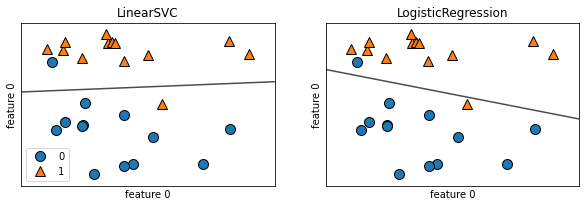

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=0.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 0")
    axes[0].legend()

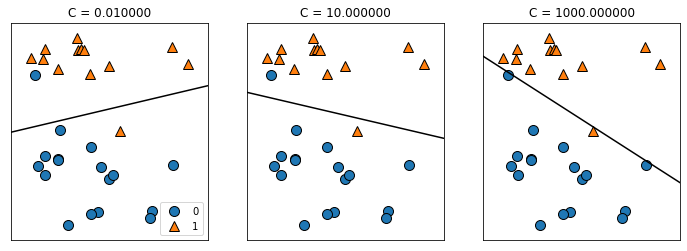

In [3]:
# Check how C works
mglearn.plots.plot_linear_svc_regularization()

### Binary Classification
#### Example 1: Breast Cancer Datasets

In [4]:
# Logistic Regression
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    stratify=cancer.target, random_state=42)
logreg = LogisticRegression(C=1).fit(X_train, y_train)
print("Score for Training Set:{:.3f}".format(logreg.score(X_train, y_train)))
print("Score for Testing Set:{:.3f}".format(logreg.score(X_test, y_test)))

Score for Training Set:0.946
Score for Testing Set:0.958


In [5]:
# Logistic Regression with c = 100
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Score for Training Set:{:.3f}".format(logreg100.score(X_train, y_train)))
print("Score for Testing Set:{:.3f}".format(logreg100.score(X_test, y_test)))

Score for Training Set:0.946
Score for Testing Set:0.958


In [6]:
# Logistic Regression with c = 0.01
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Score for Training Set:{:.3f}".format(logreg001.score(X_train, y_train)))
print("Score for Testing Set:{:.3f}".format(logreg001.score(X_test, y_test)))

Score for Training Set:0.934
Score for Testing Set:0.930


#### Conclusion
- Logistic Regression is as same as Ridge Regression. (L2 Regularization)
- Coefficient cannot be 0. (close to 0)
- Control the model using C
- when C is too large, it can be overfitting to the training set.
- when C is too small, it can be underfitting model.

### Multi Classification
- In logistic classification, use the softmax function.
    - $ Pr(Y_i=c) = \frac{e^{W_c \times X_i}}{\sum_{n=1}^{\infty} e^{W_c \times X_i}}$
- In SVM, nothing... Thus, we will use one vs rest to do multi classification

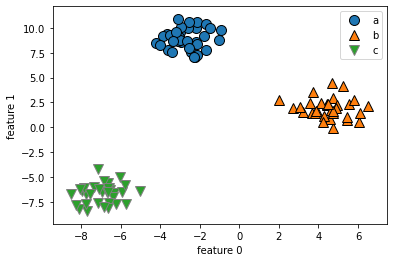

In [7]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.legend(["a", "b", "c"])

In [8]:
# Linear SVC
linear_svm = LinearSVC().fit(X,y)

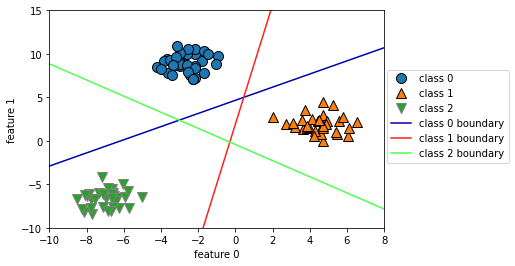

In [9]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.legend(['class 0', 'class 1', 'class 2', 'class 0 boundary', 'class 1 boundary',
            'class 2 boundary'], loc=(1.01, 0.3))

Text(0, 0.5, 'feature 1')

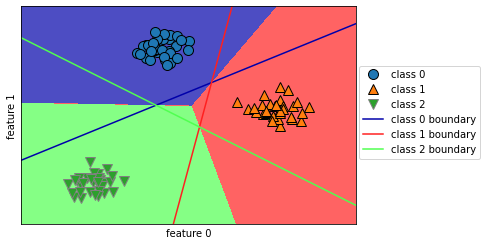

In [10]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['class 0', 'class 1', 'class 2', 'class 0 boundary', 'class 1 boundary',
            'class 2 boundary'], loc=(1.01, 0.3))
plt.xlabel("feature 0")
plt.ylabel("feature 1")

### Conclusion
- Decide the attributes.
    - alpha from regression model
    - C from linear svc and logistic regression
- Decide using L2 Regularization or L1 Regularization
    - There are so many trash features, use L1
    - Generally use L2
- Linear Models are good for large dataset
    - To make our dataset even faster use **solver='sag'** Stochastic Average Gradient Descent
    - Other way is using SGDClassifier or SGDRegressor
        - SGD = Stochastic Gradient Descent
